# Roads data

Roads data from here: https://gis.data.mass.gov/datasets/massgis::massgis-massdot-roads/api

In [8]:
import geopandas as gpd

from massgis_api import MassGISAPI
from connect_db import get_db
import constants

table_name = "waltham_roads"

con = get_db()

In [9]:

api = MassGISAPI(service="MassDOTRoads_gdb", layer=0)
features = api.query(where="CITY=308")

Fetched 2000 features...
Fetched 2728 features...


In [10]:
df = gpd.GeoDataFrame.from_features(features)
df.set_crs(epsg=constants.DEFAULT_CRS, inplace=True)
len(df)

2728

In [11]:
df.head()

,geometry,OBJECTID,STREETNAME,CLASS,ADMIN_TYPE,RT_NUMBER,ALTRTNUM1,ALTRTNUM2,ALTRTNUM3,ALTRTNUM4,...,RPA,RTA,MILE_COUNT,AADT,AADT_YEAR,AADT_DERIV,LENGTH_MI,LENGTH_FT,GlobalID,Shape__Length
0,"LINESTRING (219704.64 901616.563, 219728.843 9...",487,LOOP ROAD,5,0,None,None,None,None,None,...,MAPC,MBTA,NaN,NaN,NaN,NaN,0.121320,640.569936,509030c8-d7f0-4952-bce2-4543844bb8eb,263.974515
1,"LINESTRING (220071.125 901755.938, 220092.906 ...",488,LOOP ROAD,5,0,None,None,None,None,None,...,MAPC,MBTA,NaN,NaN,NaN,NaN,0.069131,365.010722,d6ddaad4-26f4-4f8e-98ba-c32c339fda95,150.545921
2,"LINESTRING (219639.437 901963.625, 219651.609 ...",489,LOOP ROAD,5,0,None,None,None,None,None,...,MAPC,MBTA,NaN,NaN,NaN,NaN,0.103475,546.348318,75897b52-84b4-4760-a668-87ce3d1ef4d2,225.702265
3,"LINESTRING (219901.844 902141.688, 219918.89 9...",490,LOOP ROAD,5,0,None,None,None,None,None,...,MAPC,MBTA,NaN,NaN,NaN,NaN,0.138160,729.487128,e3024f8a-912d-4cde-a165-0d00e385c88c,300.850709
4,"LINESTRING (221603.003 906399.579, 221679.943 ...",515,STEARNS HILL ROAD,5,0,None,None,None,None,None,...,MAPC,MBTA,NaN,NaN,NaN,NaN,0.164654,869.372943,57b9089b-99a6-4469-a1ef-a9d09974c37a,358.675171


In [12]:
df.columns

Index(['geometry', 'OBJECTID', 'STREETNAME', 'CLASS', 'ADMIN_TYPE',
       'RT_NUMBER', 'ALTRTNUM1', 'ALTRTNUM2', 'ALTRTNUM3', 'ALTRTNUM4',
       'ALTRT1TYPE', 'RDTYPE', 'ROUTE_ID', 'ROUTE_SYSTEM', 'ROUTE_NUMBER',
       'ROUTE_DIRECTION', 'RD_SEG_ID', 'STREET_NAME', 'FM_ST_NAME',
       'TO_ST_NAME', 'FACILITY', 'F_CLASS', 'URBAN_AREA', 'URBAN_TYPE',
       'F_F_CLASS', 'JURISDICTN', 'NHS', 'FD_AID_RTE', 'FD_AID_RD', 'CONTROL',
       'NUM_LANES', 'OPP_LANES', 'SURFACE_TP', 'SURFACE_WD', 'SHLDR_RT_W',
       'SHLDR_RT_T', 'SHLDR_LT_W', 'SHLDR_LT_T', 'SHLDR_UL_W', 'SHLDR_UL_T',
       'MED_WIDTH', 'MED_TYPE', 'CURB', 'LT_SIDEWLK', 'RT_SIDEWLK',
       'OPERATION', 'SPEED_LIM', 'OP_DIR_SL', 'TRUCK', 'T_EXC_TYPE',
       'T_EXC_TIME', 'TRK_NETWRK', 'TRUCK_RTE', 'ROW_WIDTH', 'STRUCT_CND',
       'TERRAIN', 'TOLL_ROAD', 'MHS', 'MGIS_TOWN', 'CITY', 'COUNTY',
       'HWY_DIST', 'MPO', 'RPA', 'RTA', 'MILE_COUNT', 'AADT', 'AADT_YEAR',
       'AADT_DERIV', 'LENGTH_MI', 'LENGTH_FT', 'GlobalID',

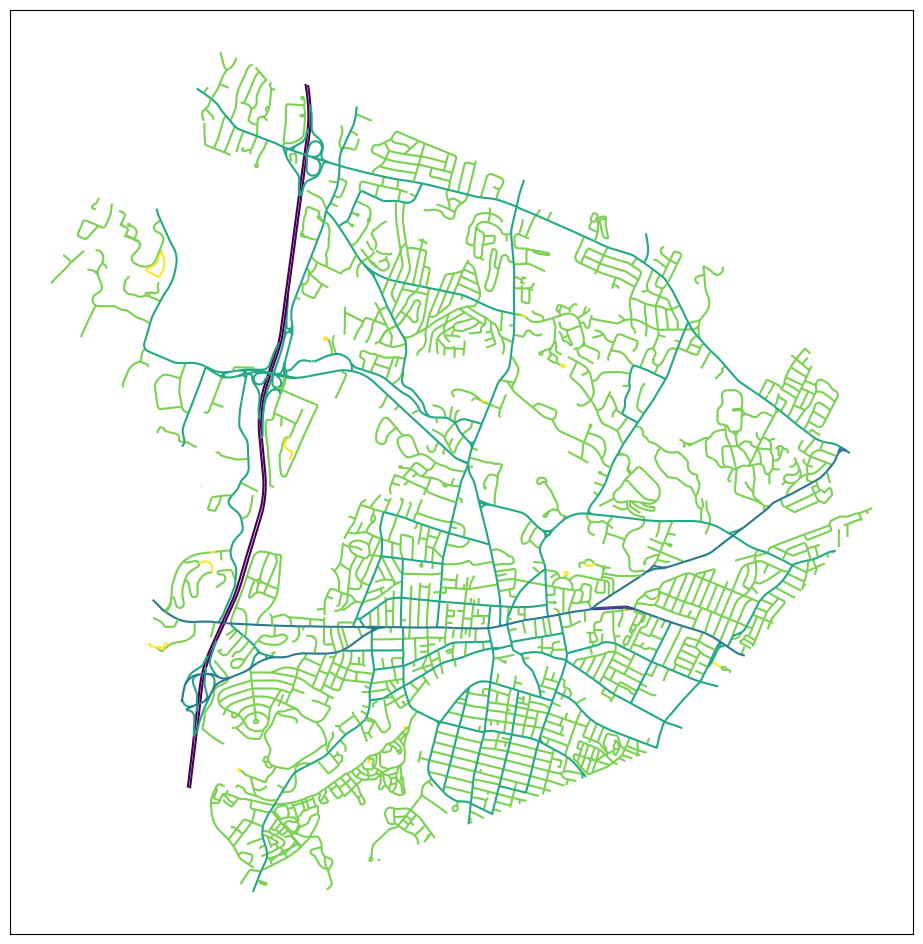

In [13]:
ax = df.plot(column="CLASS", aspect=1, figsize=(12, 12))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

In [14]:
df.to_postgis(table_name, con, if_exists="replace")